In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


import scipy.optimize as spopt
import sklearn

In [2]:
import zipfile
high_t = []
for i in range(500):
    high_t.append(np.loadtxt('./PS2-d-highT/PS2-d-highT/'+str(i).zfill(3), delimiter=',')) ## Change to your local directory!
print(len(high_t[0]))

32


In [3]:
import zipfile
low_t = []
for i in range(500):
    low_t.append(np.loadtxt('./PS2-d-lowT/PS2-d-lowT/'+str(i).zfill(3), delimiter=',')) ## Change to your local directory!

In [16]:
data_img = np.concatenate((high_t,low_t))
data_img = data_img.reshape((-1, 32*32))
data_label = np.concatenate((np.ones(len(high_t)), np.zeros(len(low_t))))

In [17]:
# Don't Set Random State to 0
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    data_img, data_label, test_size= 0.2, random_state = 10)

In [39]:
X=np.linspace(-10,10)

In [46]:
svc=SVC(C=1000,kernel='rbf',gamma=1/4096,cache_size=8000,probability=False) #(very high C, effectively infinity, aiming for exact separability)
import matplotlib.cm as cm

w=0
def partial_fit(n): #fits the classifier on the first n points
    svc.fit(train_img[:n], train_lbl[:n])   
    distance=svc.decision_function(train_img)
    scaled_distance=(distance-min(distance))/(max(distance)-min(distance))
    
    f,ax=plt.subplots(1,1)
    plt.scatter(train_img[:n,0],train_img[:n,1],c=cm.seismic(scaled_distance)) #color points according to their predicted distance
    w = svc.dual_coef_ [0]
    a = -w[0] / w[1]
    ax.plot(X, -(w[0]*X + svc.intercept_[0])/ w[1],'--g',label='predicted boundary')
    #ax.plot(X,-X*b[0]/b[1],'--',color=[0.62,0.62,0.62],label='actual boundary')
    #import pdb; pdb.set_trace()
    margin=1/np.linalg.norm(w)
    for sv in svc.support_vectors_:
        ax.add_artist(plt.Circle(sv, margin, fc='none', ec='k'))
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    ax.legend()
    ax.set_title('%d points, %d support vectors, margin is %1.3f' % (n,len(svc.support_vectors_), margin))
    ax.set_aspect('equal')
# Method to Estimate the Transition Temperature 


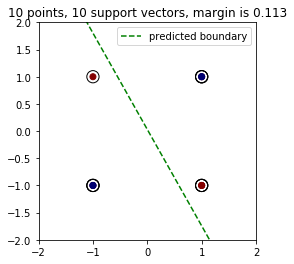

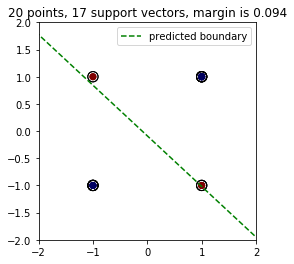

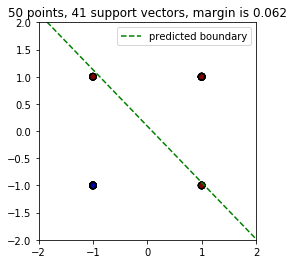

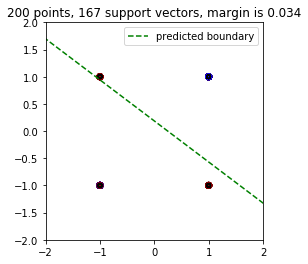

In [47]:
for n in [10,20,50,200]:
    partial_fit(n)
plt.show()

In [69]:
from sklearn.svm import SVC
#clf = SVC(gamma=1/2048)
clf = SVC(C=3,kernel='rbf',gamma=1/2048,probability=False)
clf.fit(train_img, train_lbl)
score = clf.score(test_img, test_lbl)
print(score)

1.0


In [73]:
ising_simu = Ising(32, 0.8)
result = ising_simu.simulate()
result = result.reshape((-1, 32*32))

# Parts D and E

## First, generating the data for the three lists through decision functions

In [95]:

arr = (clf.decision_function(data_img))
high_t_np = np.array(high_t)
high_t_reshaped = high_t_np.reshape((-1, 32*32))

arr_high =  (clf.decision_function(high_t_reshaped))


In [104]:
#arr = (clf.decision_function(data_img))
low_t_np = np.array(low_t)
low_t_reshaped = low_t_np.reshape((-1, 32*32))

arr_low =  (clf.decision_function(low_t_reshaped))


In [99]:
arr_high[:5]

array([0.99983122, 0.85404026, 1.00002185, 0.99967855, 0.99963455])

In [80]:
print(arr[0])

0.9998312215704737


In [88]:
average = 0
for k in arr:
    if(k >= 1):
        average = average + 10
    else:
        average = average + 0.4
print(average/len(arr))

2.2816000000000596


In [ ]:
# Temperature for High Elements

In [98]:
average = 0
for k in arr_high:
    if(k >= 1):
        average = average + 10
    else:
        average = average + 0.4
print(average/len(arr_high))

4.163200000000028


In [ ]:
# Temperature For Low Elements

In [105]:
average = 0
for k in arr_low:
    if(k >= 1):
        average = average + 10
    else:
        average = average + 0.4
print(average/len(arr_low))

0.4000000000000035


In [13]:
# Method to Estimate the Transition Temperature 
for n in [10,20,50,200]:
    partial_fit(n)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
data_img = np.concatenate((high_t,low_t))
data_img = data_img.reshape((-1, 32*32))
data_label = np.concatenate((np.ones(len(high_t)), np.zeros(len(low_t))))

In [ ]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    data_img, data_label, test_size= 0.2, random_state = 10)

In [5]:
len(data_img[0])

1024

In [ ]:
# Appendix: The Ising Model that was used for generating the Simulations

In [6]:
# Simulating the Ising model
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model '''  
    def __init__(self, size, temp):
        self.temp = temp
        self.N = int(size)
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N) # select a row
                    b = np.random.randint(0, N) # select a column
                    s =  config[a, b] # current state at (a, b)
                    # periodic boundary condition imposed
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        config = 2*np.random.randint(2, size=(self.N,self.N))-1   
        times = 100
        for i in range(times):
            self.mcmove(config, self.N, 1.0/self.temp)
        return config

In [9]:
result

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
# Method to Estimate the Two Temperatures.